In [ ]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [ ]:
data = pd.read_excel('BCKQKD.xlsx')

In [ ]:
data

,STT,Mã CK,Chỉ tiêu/Ngành,Doanh thu thuần về bán hàng và cung cấp dịch vụ,Giá vốn hàng bán,Lợi nhuận gộp về bán hàng và cung cấp dịch vụ,Doanh thu hoạt động tài chính,Chi phí tài chính,Chi phí bán hàng,Chi phí quản lý doanh nghiệp,Lợi nhuận thuần từ hoạt động kinh doanh,Lợi nhuận khác,Tổng lợi nhuận kế toán trước thuế,Lợi nhuận sau thuế thu nhập doanh nghiệp,Lợi nhuận sau thuế của cổ đông Công ty mẹ
0,1,BCM,Bất động sản,6990.0,3769.0,3221.0,69,875.0,624.0,597,2216,-472.0,1744,1457,1405
1,2,BII,Bất động sản,493.0,488.0,5.0,86,57.0,1.0,8,25,11.0,36,33,32
2,3,CEO,Bất động sản,902.0,785.0,117.0,330,148.0,31.0,165,103,16.0,119,82,93
3,4,BAX,Bất động sản,172.0,102.0,70.0,16,0.0,NaN,24,62,7.0,69,60,60
4,5,TTD,Y tế,430.0,364.0,66.0,1,0.0,11.0,45,11,1.0,13,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,111,ICG,Bất động sản,4.0,4.0,1.0,21,0.0,NaN,11,11,4.0,16,13,13
111,112,ICI,Bất động sản,10.0,8.0,2.0,1,0.0,NaN,3,-1,1.0,0,0,0
112,113,IDV,Bất động sản,121.0,38.0,83.0,62,-1.0,1.0,13,167,2.0,168,156,156
113,114,IDJ,Bất động sản,893.0,594.0,300.0,19,11.0,33.0,46,227,27.0,254,203,203


# Preprocessing

In [ ]:
data.drop('STT',axis=1,inplace = True)

In [ ]:
data

,Mã CK,Chỉ tiêu/Ngành,Doanh thu thuần về bán hàng và cung cấp dịch vụ,Giá vốn hàng bán,Lợi nhuận gộp về bán hàng và cung cấp dịch vụ,Doanh thu hoạt động tài chính,Chi phí tài chính,Chi phí bán hàng,Chi phí quản lý doanh nghiệp,Lợi nhuận thuần từ hoạt động kinh doanh,Lợi nhuận khác,Tổng lợi nhuận kế toán trước thuế,Lợi nhuận sau thuế thu nhập doanh nghiệp,Lợi nhuận sau thuế của cổ đông Công ty mẹ
0,BCM,Bất động sản,6990.0,3769.0,3221.0,69,875.0,624.0,597,2216,-472.0,1744,1457,1405
1,BII,Bất động sản,493.0,488.0,5.0,86,57.0,1.0,8,25,11.0,36,33,32
2,CEO,Bất động sản,902.0,785.0,117.0,330,148.0,31.0,165,103,16.0,119,82,93
3,BAX,Bất động sản,172.0,102.0,70.0,16,0.0,NaN,24,62,7.0,69,60,60
4,TTD,Y tế,430.0,364.0,66.0,1,0.0,11.0,45,11,1.0,13,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,ICG,Bất động sản,4.0,4.0,1.0,21,0.0,NaN,11,11,4.0,16,13,13
111,ICI,Bất động sản,10.0,8.0,2.0,1,0.0,NaN,3,-1,1.0,0,0,0
112,IDV,Bất động sản,121.0,38.0,83.0,62,-1.0,1.0,13,167,2.0,168,156,156
113,IDJ,Bất động sản,893.0,594.0,300.0,19,11.0,33.0,46,227,27.0,254,203,203


In [ ]:
data.shape

(115, 14)

In [ ]:
data.dtypes # kiểm tra kiểu dữ liệu của từng cột

Mã CK                                               object
Chỉ tiêu/Ngành                                      object
Doanh thu thuần về bán hàng và cung cấp dịch vụ    float64
Giá vốn hàng bán                                   float64
Lợi nhuận gộp về bán hàng và cung cấp dịch vụ      float64
Doanh thu hoạt động tài chính                        int64
Chi phí tài chính                                  float64
Chi phí bán hàng                                   float64
Chi phí quản lý doanh nghiệp                         int64
Lợi nhuận thuần từ hoạt động kinh doanh              int64
Lợi nhuận khác                                     float64
Tổng lợi nhuận kế toán trước thuế                    int64
Lợi nhuận sau thuế thu nhập doanh nghiệp             int64
Lợi nhuận sau thuế của cổ đông Công ty mẹ            int64
dtype: object

In [ ]:
data.duplicated().sum() # tinh số lượng các dòng giống nhau

2

In [ ]:
data.isnull().sum() # tính số lượng mising value của từng cột

Mã CK                                               0
Chỉ tiêu/Ngành                                      0
Doanh thu thuần về bán hàng và cung cấp dịch vụ     2
Giá vốn hàng bán                                    2
Lợi nhuận gộp về bán hàng và cung cấp dịch vụ       1
Doanh thu hoạt động tài chính                       0
Chi phí tài chính                                  11
Chi phí bán hàng                                   39
Chi phí quản lý doanh nghiệp                        0
Lợi nhuận thuần từ hoạt động kinh doanh             0
Lợi nhuận khác                                      2
Tổng lợi nhuận kế toán trước thuế                   0
Lợi nhuận sau thuế thu nhập doanh nghiệp            0
Lợi nhuận sau thuế của cổ đông Công ty mẹ           0
dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data[data.isnull().any(axis=1)]

,Mã CK,Chỉ tiêu/Ngành,Doanh thu thuần về bán hàng và cung cấp dịch vụ,Giá vốn hàng bán,Lợi nhuận gộp về bán hàng và cung cấp dịch vụ,Doanh thu hoạt động tài chính,Chi phí tài chính,Chi phí bán hàng,Chi phí quản lý doanh nghiệp,Lợi nhuận thuần từ hoạt động kinh doanh,Lợi nhuận khác,Tổng lợi nhuận kế toán trước thuế,Lợi nhuận sau thuế thu nhập doanh nghiệp,Lợi nhuận sau thuế của cổ đông Công ty mẹ
3,BAX,Bất động sản,172.0,102.0,70.0,16,0.0,NaN,24,62,7.0,69,60,60
5,TNH,Y tế,412.0,202.0,211.0,0,42.0,NaN,22,147,0.0,147,143,143
8,BHT,Bất động sản,-2.0,5.0,-7.0,1,4.0,NaN,1,-11,5.0,-6,-6,-6
9,BCE,Bất động sản,111.0,74.0,37.0,1,5.0,NaN,14,19,7.0,26,22,22
10,ATB,Bất động sản,0.0,0.0,0.0,2,5.0,NaN,75,-77,0.0,-77,-77,-77
12,CC4,Bất động sản,164.0,148.0,16.0,1,8.0,NaN,16,-7,32.0,25,20,20
17,CIG,Bất động sản,30.0,14.0,16.0,0,1.0,NaN,6,9,7.0,17,17,16
18,CID,Bất động sản,5.0,2.0,3.0,0,0.0,NaN,2,1,0.0,1,1,1
19,CH5,Bất động sản,82.0,72.0,10.0,1,NaN,NaN,5,5,0.0,5,5,5
20,CHS,Bất động sản,437.0,337.0,100.0,7,NaN,NaN,74,33,0.0,33,27,27


cột chi phí bán hàng có lượng missing value quá 1/3 số lượng của cột ; số lượng missing value liền nhau quá nhiều và không thể bổ sung bằng cách tính giá trị trung bình và tìm kiếm nên ta suy ra xóa cột

In [ ]:
data.drop(columns="Chi phí bán hàng")

,Mã CK,Chỉ tiêu/Ngành,Doanh thu thuần về bán hàng và cung cấp dịch vụ,Giá vốn hàng bán,Lợi nhuận gộp về bán hàng và cung cấp dịch vụ,Doanh thu hoạt động tài chính,Chi phí tài chính,Chi phí quản lý doanh nghiệp,Lợi nhuận thuần từ hoạt động kinh doanh,Lợi nhuận khác,Tổng lợi nhuận kế toán trước thuế,Lợi nhuận sau thuế thu nhập doanh nghiệp,Lợi nhuận sau thuế của cổ đông Công ty mẹ
0,BCM,Bất động sản,6990.0,3769.0,3221.0,69,875.0,597,2216,-472.0,1744,1457,1405
1,BII,Bất động sản,493.0,488.0,5.0,86,57.0,8,25,11.0,36,33,32
2,CEO,Bất động sản,902.0,785.0,117.0,330,148.0,165,103,16.0,119,82,93
3,BAX,Bất động sản,172.0,102.0,70.0,16,0.0,24,62,7.0,69,60,60
4,TTD,Y tế,430.0,364.0,66.0,1,0.0,45,11,1.0,13,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,ICG,Bất động sản,4.0,4.0,1.0,21,0.0,11,11,4.0,16,13,13
111,ICI,Bất động sản,10.0,8.0,2.0,1,0.0,3,-1,1.0,0,0,0
112,IDV,Bất động sản,121.0,38.0,83.0,62,-1.0,13,167,2.0,168,156,156
113,IDJ,Bất động sản,893.0,594.0,300.0,19,11.0,46,227,27.0,254,203,203


In [ ]:
data.fillna(0,inplace=True)

In [ ]:
data.loc[75]

Mã CK                                                       LSG
Chỉ tiêu/Ngành                                     Bất động sản
Doanh thu thuần về bán hàng và cung cấp dịch vụ             0.0
Giá vốn hàng bán                                            0.0
Lợi nhuận gộp về bán hàng và cung cấp dịch vụ               0.0
Doanh thu hoạt động tài chính                               259
Chi phí tài chính                                         232.0
Chi phí bán hàng                                            0.0
Chi phí quản lý doanh nghiệp                                 12
Lợi nhuận thuần từ hoạt động kinh doanh                      15
Lợi nhuận khác                                              0.0
Tổng lợi nhuận kế toán trước thuế                            15
Lợi nhuận sau thuế thu nhập doanh nghiệp                     12
Lợi nhuận sau thuế của cổ đông Công ty mẹ                    12
Name: 75, dtype: object

- 1 số dòng tìm lại nguồn từ trên mạng và fill lại

In [ ]:
data.loc[75,'Doanh thu thuần về bán hàng và cung cấp dịch vụ'] = 233.0

In [ ]:
data.loc[83,'Doanh thu thuần về bán hàng và cung cấp dịch vụ'] = 585.0

In [ ]:
data.loc[75,'Lợi nhuận gộp về bán hàng và cung cấp dịch vụ'] = 0.0

In [ ]:
data.loc[75,'Giá vốn hàng bán'] = 148.3

In [ ]:
data.loc[45,'Giá vốn hàng bán']= 2.0

In [ ]:
data.loc[19,'Chi phí tài chính']=12.25

- fill lại các missing value cột Chi phí bán hàng bằng cách tính trung bình ( do sự chênh lệch các giá trị giữa các dòng trong  trong cột không quá lớn nên dùng phương pháp này )

In [ ]:
for i in range(len(data)):
    if(data.loc[i,['Chi phí tài chính']][0]==0):
        print("davao",i)
        data.loc[i,['Chi phí tài chính']]=(data.loc[i+1,['Chi phí tài chính']]+data.loc[i-1,['Chi phí tài chính']])/2

davao 3
davao 4
davao 18
davao 20
davao 30
davao 34
davao 35
davao 41
davao 45
davao 51
davao 52
davao 55
davao 59
davao 61
davao 78
davao 101
davao 107
davao 109
davao 110
davao 111


In [ ]:
data

,Mã CK,Chỉ tiêu/Ngành,Doanh thu thuần về bán hàng và cung cấp dịch vụ,Giá vốn hàng bán,Lợi nhuận gộp về bán hàng và cung cấp dịch vụ,Doanh thu hoạt động tài chính,Chi phí tài chính,Chi phí bán hàng,Chi phí quản lý doanh nghiệp,Lợi nhuận thuần từ hoạt động kinh doanh,Lợi nhuận khác,Tổng lợi nhuận kế toán trước thuế,Lợi nhuận sau thuế thu nhập doanh nghiệp,Lợi nhuận sau thuế của cổ đông Công ty mẹ
0,BCM,Bất động sản,6990.0,3769.0,3221.0,69,875.000,624.0,597,2216,-472.0,1744,1457,1405
1,BII,Bất động sản,493.0,488.0,5.0,86,57.000,1.0,8,25,11.0,36,33,32
2,CEO,Bất động sản,902.0,785.0,117.0,330,148.000,31.0,165,103,16.0,119,82,93
3,BAX,Bất động sản,172.0,102.0,70.0,16,74.000,0.0,24,62,7.0,69,60,60
4,TTD,Y tế,430.0,364.0,66.0,1,58.000,11.0,45,11,1.0,13,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,ICG,Bất động sản,4.0,4.0,1.0,21,0.250,0.0,11,11,4.0,16,13,13
111,ICI,Bất động sản,10.0,8.0,2.0,1,-0.375,0.0,3,-1,1.0,0,0,0
112,IDV,Bất động sản,121.0,38.0,83.0,62,-1.000,1.0,13,167,2.0,168,156,156
113,IDJ,Bất động sản,893.0,594.0,300.0,19,11.000,33.0,46,227,27.0,254,203,203


# Thống kê

In [ ]:
bds = data['Chỉ tiêu/Ngành']=='Bất động sản'
data_bds = data[bds]
x = data_bds['Mã CK'].loc[:data_bds.shape[0]/2]
y = data_bds['Lợi nhuận sau thuế của cổ đông Công ty mẹ'].loc[:data_bds.shape[0]/2]

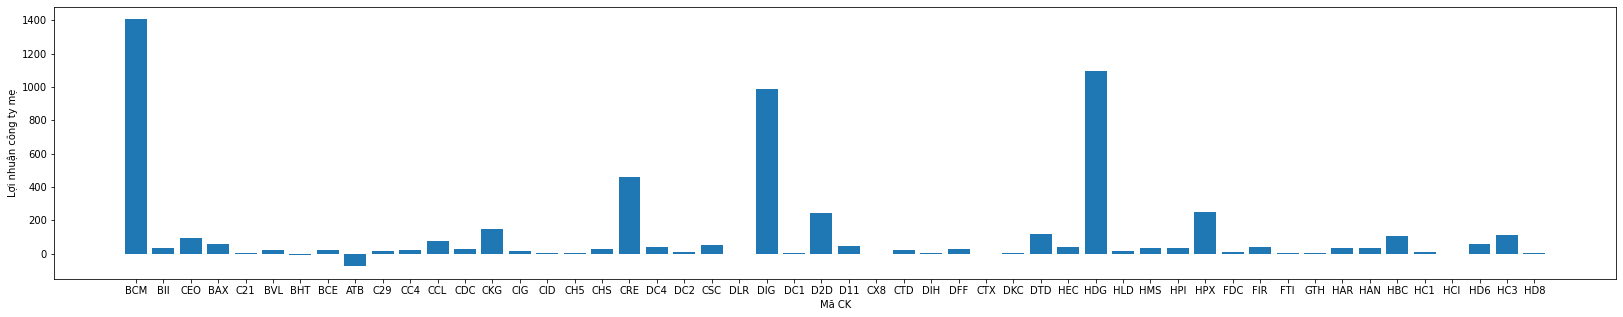

In [ ]:
plt.figure(figsize=(28,5))
plt.bar(x, y)
plt.xlabel('Mã CK')
plt.ylabel('Lợi nhuận công ty mẹ')
plt.show()

In [ ]:
bds = data['Chỉ tiêu/Ngành']=='Bất động sản'
data_bds = data[bds]
x1 = data_bds['Mã CK'].loc[data_bds.shape[0]/2:]
y1 = data_bds['Lợi nhuận sau thuế của cổ đông Công ty mẹ'].loc[data_bds.shape[0]/2:]

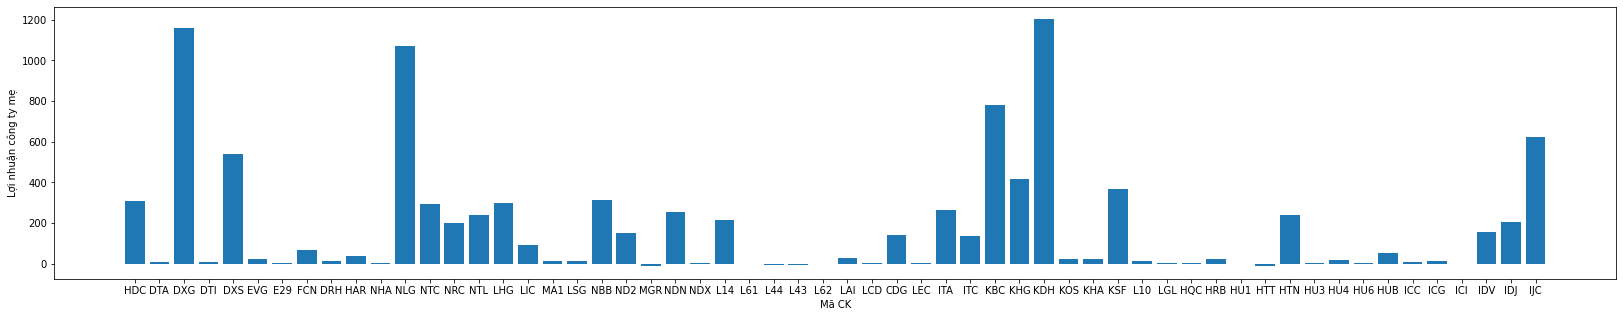

In [ ]:
plt.figure(figsize=(28,5))
plt.bar(x1, y1)
plt.xlabel('Mã CK')
plt.ylabel('Lợi nhuận công ty mẹ')
plt.show()

- Nhìn qua thì thấy có 1 số mã là cao hẳn so với các mã còn lại
- Chủ yếu là ở mức 600 đổ xuống
=> Có thể kết luận trong năm vừa qua nền kinh tế bất động sản không được tốt

In [ ]:
Y_te = data['Chỉ tiêu/Ngành']=='Y tế'
data_yt = data[Y_te]
x1 = data_yt['Mã CK']
y1 = data_yt['Lợi nhuận sau thuế của cổ đông Công ty mẹ']

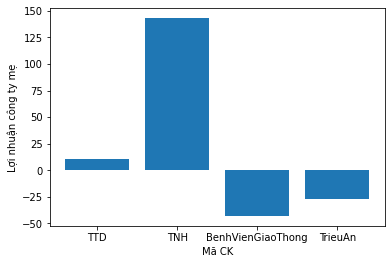

In [ ]:
# plt.figure(figsize=(28,5))
plt.bar(x1, y1)
plt.xlabel('Mã CK')
plt.ylabel('Lợi nhuận công ty mẹ')
plt.show()

- Do quá ít data về y tế nên gặp bất lợi về thống kê y tế
- Tại sao mã TNH lại tăng vọt so với 3 mã còn lại
=> Có thể do công ty TNH có được 1 sản phẩm công nghệ mới nên thu hút được sự quan tâm từ các nhà đầu tư

## Tổng kết lại thì trong năm nay thị trường bất động sản và y tế có vẻ xuống khá trầm trọng, các nhà đầu tư nên suy nghĩ cẩn trọng trước khi mua mã

# Mô hình

## Bất động sản

In [ ]:
#Đầu vào là các lợi nhuận, doanh thu khác công ty mẹ
#Đầu ra là doanh thu sau thuế của công ty mẹ

X = np.array(data.drop(['Lợi nhuận sau thuế của cổ đông Công ty mẹ','Mã CK','Chỉ tiêu/Ngành'], axis=1))
Y = np.array(data['Lợi nhuận sau thuế của cổ đông Công ty mẹ'])

In [ ]:
#Lựa chọn mô hình tốt nhất
from sklearn.preprocessing import StandardScaler
rate = 0.2
mse = np.zeros((5,3))
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = rate, random_state = 42)
    model1 = LogisticRegression()
    model2 = DecisionTreeRegressor()
    model3 = KNeighborsRegressor()
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    model1.fit(X_train, y_train)
    model2.fit(X_train, y_train)
    model3.fit(X_train, y_train)
    yhat1 = model1.predict(X_test)
    yhat2 = model2.predict(X_test)
    yhat3 = model3.predict(X_test)
    mse[i][0] = metrics.mean_squared_error(y_test, yhat1)
    mse[i][1] = metrics.mean_squared_error(y_test, yhat2)
    mse[i][2] = metrics.mean_squared_error(y_test, yhat3)
print('Mean MSE:',np.mean(mse, axis = 0))
print('Index:', np.argmin(np.mean(mse, axis = 0)))

Mean MSE: [135851.52173913  13879.51304348  47554.29217391]
Index: 1


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

- Mô hình decision tree có kết quả tốt nhất

In [ ]:
kf = KFold(n_splits=10, shuffle = True, random_state = 42)

In [ ]:
#Tối ưu mô hình bằng cách tìm các siêu tham số phù hợp
C = np.arange(2,50)
mse = np.zeros((10,48))
i=0
for i,(train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]
    sc = StandardScaler()
    sc.fit(X_train)
    X_tr = sc.transform(X_train)
    X_vl = sc.transform(X_val)
    j = 0
    for c in C:
        model = DecisionTreeRegressor(min_samples_leaf=1, max_depth = c, random_state=42)
        model.fit(X_train, Y_train)
        yhat = model.predict(X_val)
        mse[i][j]=metrics.mean_squared_error(Y_val, yhat)
        j+=1
    i+=1
# print(acc)
print('Mean MSE:',np.mean(mse, axis = 0))
print('Index:', np.argmin(np.mean(mse, axis = 0)))

Mean MSE: [ 9788.59545497  8499.26243866  8141.89384022  6957.48785913
 10542.35127932  7948.64675151  6907.60525022  7202.79915851
  9617.07199747  7456.5219697   8163.8469697   8163.8469697
  8163.8469697   8163.8469697   8163.8469697   8163.8469697
  8163.8469697   8163.8469697   8163.8469697   8163.8469697
  8163.8469697   8163.8469697   8163.8469697   8163.8469697
  8163.8469697   8163.8469697   8163.8469697   8163.8469697
  8163.8469697   8163.8469697   8163.8469697   8163.8469697
  8163.8469697   8163.8469697   8163.8469697   8163.8469697
  8163.8469697   8163.8469697   8163.8469697   8163.8469697
  8163.8469697   8163.8469697   8163.8469697   8163.8469697
  8163.8469697   8163.8469697   8163.8469697   8163.8469697 ]
Index: 6


In [ ]:
C[6]

8

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
sc = StandardScaler()
sc.fit(X)
x_sc = sc.transform(X_train)
xt_sc = sc.transform(X_test)
model = DecisionTreeRegressor(min_samples_leaf=1, max_depth = 8)
model.fit(x_sc, y_train)
model.score(xt_sc,y_test)

0.9359524660373245

- Kết quả cuối của mô hình dự đoán được cho ra sấp sỉ 94% đúng